In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def get_st_res(log_file='minmin8_resnet18.log',num_epochs=60):
    nat_accu,rob_accu,loss,accu_on_train,train_loss =[],[],[],[],[]

    with open(log_file,encoding='utf-8',mode='r') as f:
        res_lines = f.readlines()
        
        test_res=[]
        train_res=[]
        for i,line in enumerate(res_lines):
            line = line.split(' ')
            #print(line)
            if len(line)>2:
                if line[2]=='====================Eval':
                    test_res.append(res_lines[i+1].split('\t'))
                    train_res.append(res_lines[i-1].split('\t'))
        train_res=train_res[:num_epochs]
        test_res=test_res[:num_epochs]
        

        for i in range(num_epochs):
            nat_accu.append(float(test_res[i][3][8:]))
            rob_accu.append(float(test_res[i][-2][10:]))
            loss.append(float(test_res[i][7][9:]))
            accu_on_train.append(float(train_res[i][3][8:]))
            train_loss.append(float(train_res[i][5][9:]))


    res={'nat_accu':nat_accu,'rob_accu':rob_accu,'loss':loss,'accu_on_train':accu_on_train,'train_loss':train_loss}
    return res

In [3]:

minmin8_resnet18 = get_st_res('logs/minmin8_resnet18.log',num_epochs=60)
minmin8_resnet18_madrys = get_st_res('logs/minmin8_resnet18_madrys.log',num_epochs=100)
clean_resnet18 = get_st_res('logs/clean_resnet18.log',num_epochs=60)
clean_resnet18_madrys = get_st_res('logs/clean_resnet18_madrys.log',num_epochs=100)
#random_32_resnet18_madrys = get_st_res('random_32_resnet18_madrys.log',num_epochs=100)





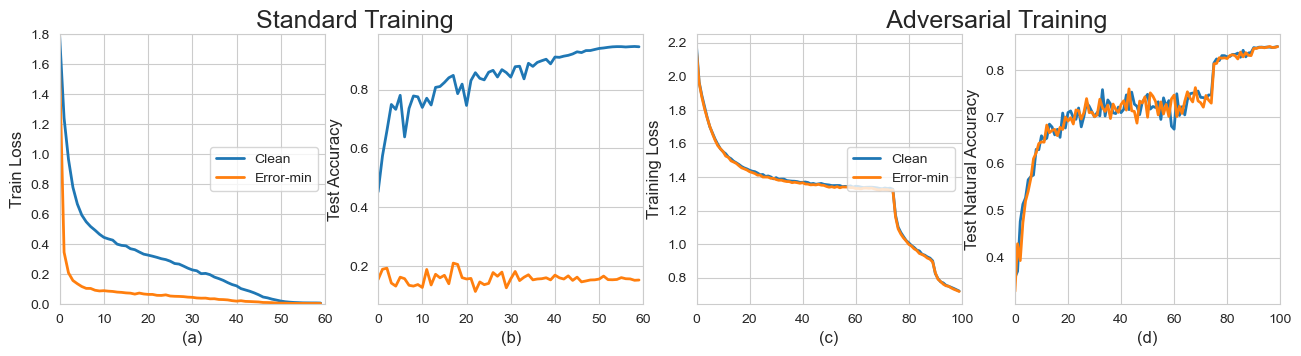

In [4]:
plt.figure(figsize=(15.75,3.5))
sns.set_style("whitegrid")
label_size=12
# plot 1, train_loss of st
plt.subplot(1, 4, 1)
df=pd.DataFrame(data={
    "epoch":range(60),
    "clean":clean_resnet18['train_loss'],
    "error-min":minmin8_resnet18['train_loss']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Clean', 'Error-min'], loc='center right')

ax.set_xlabel('(a)',fontsize=label_size)
ax.set_ylabel('Train Loss',fontsize=label_size)

#plt.title('(a)',y=-0.15)
ax.set_xlim([0,60])

ax.set_ylim([0,1.8])



# plot 2, test accu of st
plt.subplot(1, 4, 2)
df=pd.DataFrame(data={
    "epoch":range(60),
    "clean":clean_resnet18['nat_accu'],
    "error-min":minmin8_resnet18['nat_accu']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Clean', 'Error-min'], loc='center right')
ax.get_legend().remove()

ax.set_xlabel('(b)',fontsize=label_size)
ax.set_ylabel('Test Accuracy',fontsize=label_size)
#plt.title('(b)',y=-0.15)
ax.set_xlim([0,60])



# plot 2, test accu of st
plt.subplot(1, 4, 3)

df=pd.DataFrame(data={
    "epoch":range(100),
    "clean":clean_resnet18_madrys['train_loss'],
    "error-min":minmin8_resnet18_madrys['train_loss']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Clean', 'Error-min'], loc='center right')

ax.set_xlabel('(c)',fontsize=label_size)
ax.set_ylabel('Training Loss',fontsize=label_size)
#plt.title('(c)',y=-0.15)
ax.set_xlim([0,100])
#ax.set_ylim([0.6,2.2])




plt.subplot(1, 4, 4)
df=pd.DataFrame(data={
    "epoch":range(100),
    "clean":clean_resnet18_madrys['nat_accu'],
    "error-min":minmin8_resnet18_madrys['nat_accu']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Elean', 'Error-min'], loc='center right')
ax.get_legend().remove()
ax.set_xlabel('(d)',fontsize=label_size)

ax.set_ylabel('Test Natural Accuracy',fontsize=label_size)
#plt.title('(d)',y=-0.15)

ax.set_xlim([0,100])

#plt.subplots_adjust()


plt.suptitle('         Standard Training                                                              Adversarial Training',x=0.5,y=0.95,fontsize=18)
plt.savefig('figures/why_error_min_fails.pdf', bbox_inches='tight',  pad_inches = 0)
plt.show()



